In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from eofs.standard import Eof
import cartopy.crs as ccrs
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
ds = xr.open_dataset("central_america_prec_anomaly_GHCN.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:    (LAT: 40, LON: 76, TIME: 300, bnds: 2)
Coordinates:
  * LON        (LON) float32 240.2 240.8 241.2 241.8 ... 276.2 276.8 277.2 277.8
  * LAT        (LAT) float32 10.25 10.75 11.25 11.75 ... 28.25 28.75 29.25 29.75
  * TIME       (TIME) datetime64[ns] 1990-01-01 1990-02-01 ... 2014-12-01
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) datetime64[ns] ...
    PREC_ANOM  (TIME, LAT, LON) float64 ...
Attributes:
    history:      Thu Apr  1 11:18:10 2021: ncrename -d LON481_556,LON -v LON...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.7 (Homepage = http://nco.sf.ne...

In [4]:
z_djf = ds.variables['PREC_ANOM'].values
lons = ds.variables['LON'].values
lats = ds.variables['LAT'].values
times = ds.variables['TIME'].values

In [5]:
coslat = np.cos(np.deg2rad(lats)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(z_djf, weights=wgts)
eof1 = solver.eofs(neofs=1)
pc1 = solver.pcs(npcs=1)
varfrac = solver.varianceFraction()

Text(0.5, 1.0, 'EOF1')

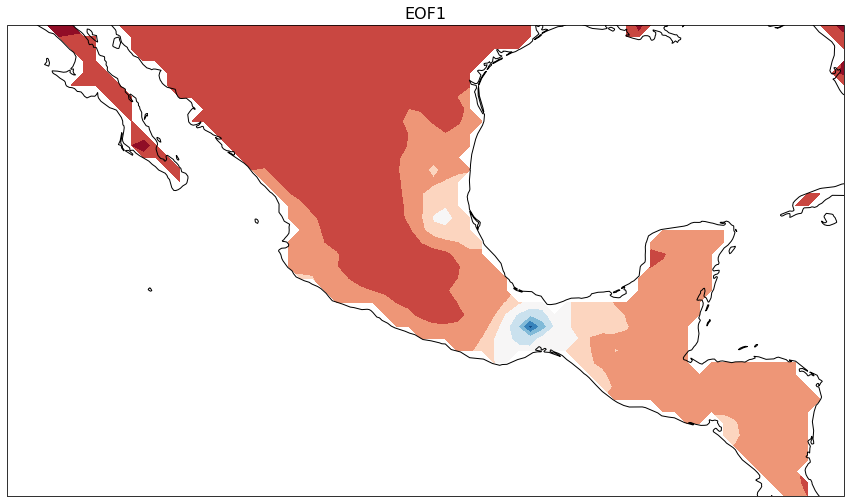

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_global()
ax.coastlines()
ax.contourf(lons, lats, eof1.squeeze(), cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree())
plt.title('EOF1', fontsize=16)

Text(0.5, 1.0, 'Variance Fraction')

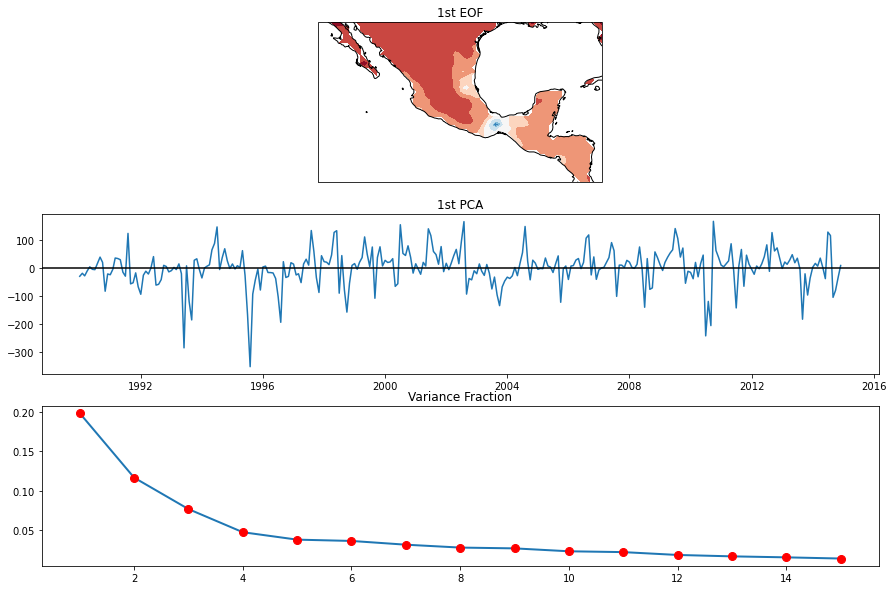

In [7]:
ax1 = plt.subplot(3, 1, 1, projection=ccrs.PlateCarree())
# ax.set_global()
ax1.coastlines()
ax1.contourf(lons, lats, eof1.squeeze(), cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree())
ax1.set_title("1st EOF")

ax2 = plt.subplot(3, 1, 2)
ax2.plot(times, pc1.squeeze())
ax2.axhline(0, color='k')
ax2.set_title("1st PCA")

ax3 = plt.subplot(3, 1, 3)
eof_num = range(1, 16)
ax3.plot(eof_num, varfrac[0:15], linewidth=2)
ax3.plot(eof_num, varfrac[0:15], linestyle='None', marker="o", color='r', markersize=8)
ax3.set_title("Variance Fraction")

In [8]:
print(f"fraction of the total variance is explained by your first EOF: {varfrac[0]}")

fraction of the total variance is explained by your first EOF: 0.19822266181789136


In [9]:
print("region of Mexico experiences the least variation in rainfall: NORTHERN MEXICO")

region of Mexico experiences the least variation in rainfall: NORTHERN MEXICO


In [10]:
print("part of the country experiences the most extreme rainfall events: SOUTHEAST MEXICO")

part of the country experiences the most extreme rainfall events: SOUTHEAST MEXICO
